In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df_electricity = pd.read_csv('electricity_data_nl_2022_2024_hourly_flow.csv', index_col=0, parse_dates=True)
df_weather = pd.read_csv('hist_weather_data_2022-2024_app_temp2025-03-19T09-46-18+00-00.csv', index_col=0, parse_dates=True)
df_weather_debilt = df_weather[df_weather['location'] == 'DeBilt']

In [55]:
df_electricity.index = pd.to_datetime(df_electricity.index)
df_weather_debilt.index = pd.to_datetime(df_weather_debilt.index)

merged_df_elec_weather = pd.merge(df_electricity, df_weather_debilt, left_index=True, right_index=True, how='inner')

In [93]:
# Define the base file path and the list of file suffixes (23, 24, 28, 31, 53, 54, 55, 56= empty)
base_file_path = '../../src/data/ned-api/csv-hr-data/power-gen-type-2022-2024-'
file_suffixes = [1, 2, 4, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 25, 26, 27, 35, 50, 51]
merged_df_total = merged_df_elec_weather.copy()

# Iterate over the file suffixes and merge the data
for suffix in file_suffixes:
    file_path = f'{base_file_path}{suffix}.csv'
    df = pd.read_csv(file_path, parse_dates=['validto'], index_col='validto')

# Rename the columns to avoid conflicts
    df = df.rename(columns={'capacity': f'capacity_{suffix}', 'volume': f'volume_{suffix}'})

# Merge the data on the index (time)
    merged_df_total = pd.merge(merged_df_total, df[[f'capacity_{suffix}', f'volume_{suffix}']], left_index=True, right_index=True, how='left')


# Rename the volume columns
merged_df_total = merged_df_total.rename(columns={
    'volume_1': 'production_wind', 
    'volume_2': 'production_solar', 
    'volume_4': 'production_heatpump', 
    'volume_8': 'production_cofiring', 
    'volume_9': 'production_geothermal', 
    'volume_10': 'production_other', 
    'volume_11': 'production_waste', 
    'volume_12': 'production_biooil', 
    'volume_13': 'production_biomass', 
    'volume_14': 'production_wood', 
    'volume_17': 'production_windoffshore', 
    'volume_18': 'production_fossilgaspower', 
    'volume_19': 'production_fossilhardcoal', 
    'volume_20': 'production_nuclear', 
    'volume_21': 'production_wastepower', 
    'volume_22': 'production_windoffshoreB', 
    'volume_25': 'production_biomasspower', 
    'volume_26': 'production_otherpower', 
    'volume_27': 'production_electricitymix', 
    'volume_35': 'production_CHP_total', 
    'volume_50': 'production_solarthermal', 
    'volume_51': 'production_allconsuminggas'
})
df_filtered = merged_df_total.loc['2022-01-01':'2023-12-31']
df_filtered.head

print(df_filtered.columns)

Index(['Load', 'Price', 'Flow_BE_to_NL', 'Flow_NL_to_BE', 'Flow_DE_to_NL',
       'Flow_NL_to_DE', 'Flow_GB_to_NL', 'Flow_NL_to_GB', 'Flow_DK_to_NL',
       'Flow_NL_to_DK', 'Flow_NO_to_NL', 'Flow_NL_to_NO', 'Flow_BE', 'Flow_DE',
       'Flow_GB', 'Flow_DK', 'Flow_NO', 'Total_Flow', 'temperature_2m',
       'apparent_temperature', 'cloud_cover', 'wind_speed_10m',
       'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation',
       'wind_speed_100m', 'location', 'capacity_1', 'production_wind',
       'capacity_2', 'production_solar', 'capacity_4', 'production_heatpump',
       'capacity_8', 'production_cofiring', 'capacity_9',
       'production_geothermal', 'capacity_10', 'production_other',
       'capacity_11', 'production_waste', 'capacity_12', 'production_biooil',
       'capacity_13', 'production_biomass', 'capacity_14', 'production_wood',
       'capacity_17', 'production_windoffshore', 'capacity_18',
       'production_fossilgaspower', 'capacity_19', 'productio

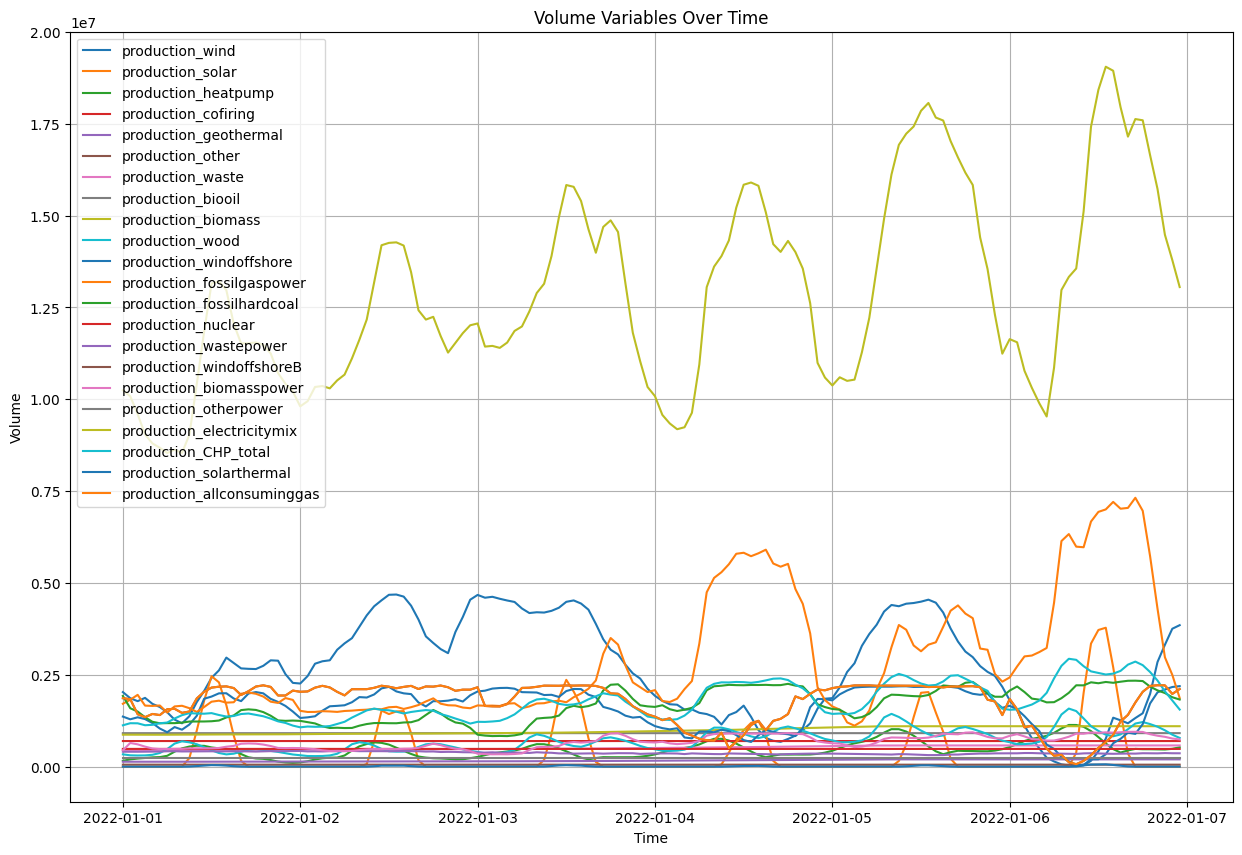

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Select columns that start with "volume"
volume_columns = [
    'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas'
]

# Filter the DataFrame to include only the volume columns
df_volume = df_filtered[volume_columns]

# Plot the volume columns
plt.figure(figsize=(15, 10))
for col in df_volume.columns:
    plt.plot(df_volume.index, df_volume[col], label=col)

plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume Variables Over Time')
plt.legend()
plt.grid(True)
plt.show()

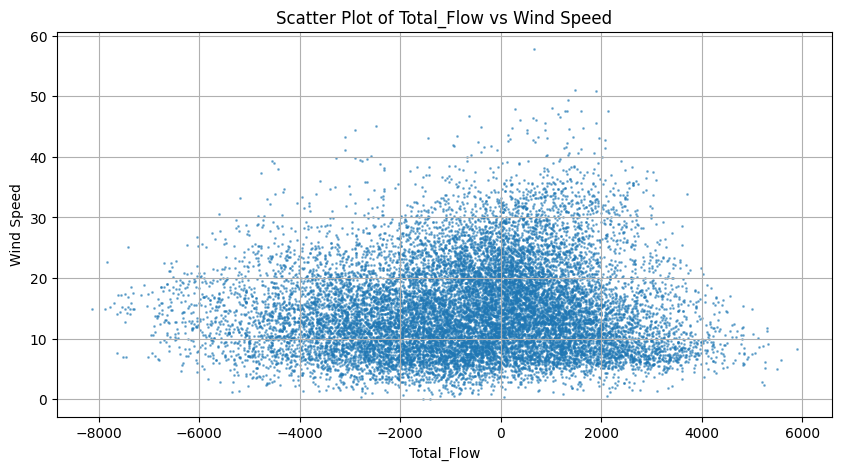

In [70]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Total_Flow'], df_filtered['wind_speed_10m'], s=1, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Total_Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Total_Flow vs Wind Speed')
plt.grid(True)
plt.show()

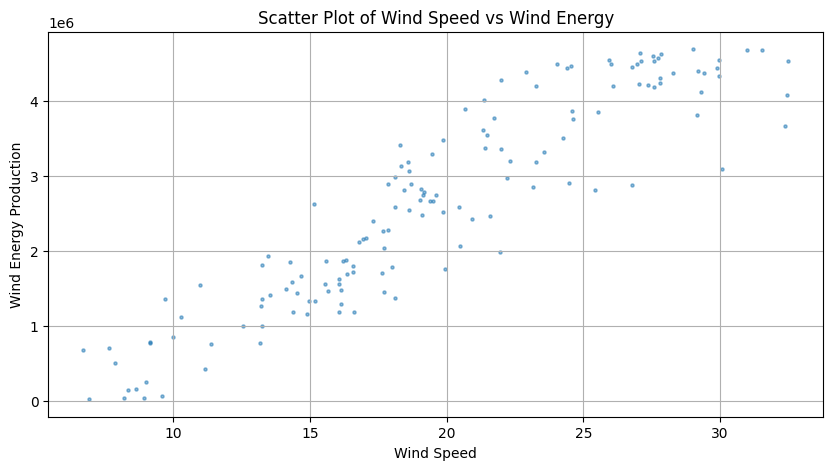

In [96]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['wind_speed_10m'], df_filtered['production_wind'], s=5, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Wind Speed')
plt.ylabel('Wind Energy Production')
plt.title('Scatter Plot of Wind Speed vs Wind Energy')
plt.grid(True)
plt.show()

In [97]:
import numpy as np

# Drop rows with missing values in 'Price' or 'Load' columns
df_filtered_ws = df_filtered[['production_wind', 'wind_speed_10m']].dropna()

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered_ws['production_wind'], df_filtered_ws['wind_speed_10m'])
print("Correlation coefficient matrix:")
print(r)

Correlation coefficient matrix:
[[1.         0.91802559]
 [0.91802559 1.        ]]


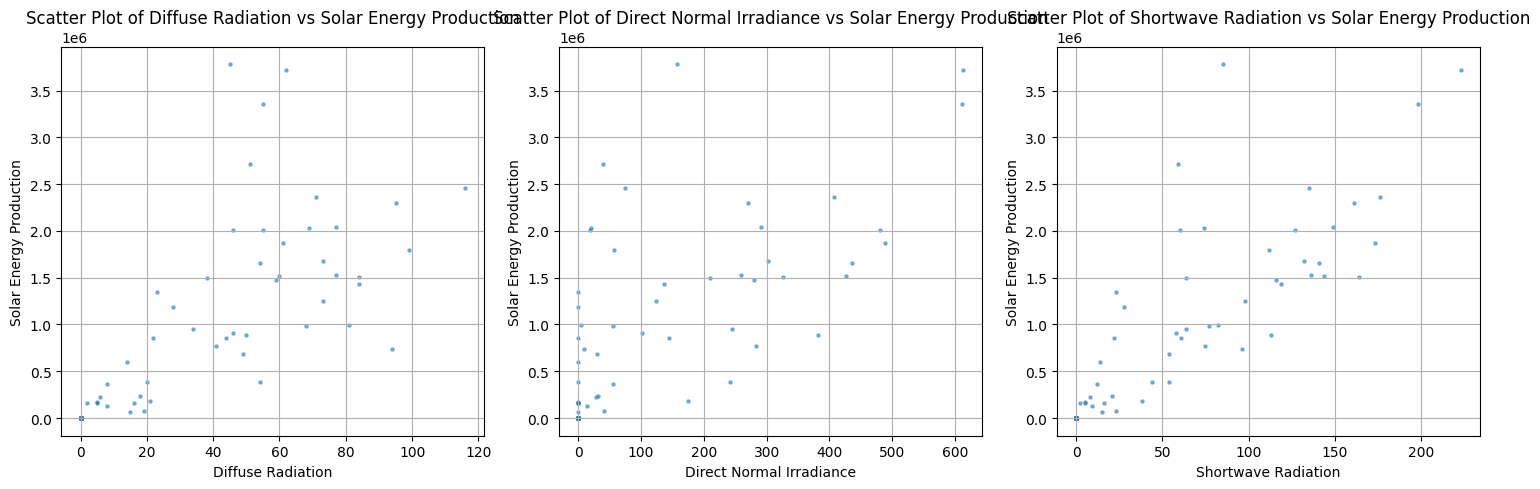

In [98]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for 'diffuse_radiation'
axs[0].scatter(df_filtered['diffuse_radiation'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[0].set_xlabel('Diffuse Radiation')
axs[0].set_ylabel('Solar Energy Production')
axs[0].set_title('Scatter Plot of Diffuse Radiation vs Solar Energy Production')
axs[0].grid(True)

# Scatter plot for 'direct_normal_irradiance'
axs[1].scatter(df_filtered['direct_normal_irradiance'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[1].set_xlabel('Direct Normal Irradiance')
axs[1].set_ylabel('Solar Energy Production')
axs[1].set_title('Scatter Plot of Direct Normal Irradiance vs Solar Energy Production')
axs[1].grid(True)

# Scatter plot for 'shortwave_radiation'
axs[2].scatter(df_filtered['shortwave_radiation'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[2].set_xlabel('Shortwave Radiation')
axs[2].set_ylabel('Solar Energy Production')
axs[2].set_title('Scatter Plot of Shortwave Radiation vs Solar Energy Production')
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [99]:
import pandas as pd
import plotly.express as px

# Select the desired columns
selected_columns = [
    'Load', 'Price', 'Total_Flow', 'temperature_2m', 'apparent_temperature', 
    'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 
    'shortwave_radiation', 'wind_speed_100m', 'location', 'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas'
]

# Filter the DataFrame to include only the selected columns
df_selected = df_filtered[selected_columns]

# Select only the numerical columns
df_numeric = df_selected.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create an interactive heatmap with Plotly
fig = px.imshow(corr_matrix, 
                labels=dict(color="Correlation"), 
                x=corr_matrix.columns, 
                y=corr_matrix.columns,
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1)

fig.update_layout(title='Correlation Matrix', width=800, height=800)

# Save the figure as an HTML file
fig.write_html("correlation_matrix.html")

# Display a message to the user
print("The interactive correlation matrix has been saved as 'correlation_matrix.html'. Open this file in your browser to view it.")

The interactive correlation matrix has been saved as 'correlation_matrix.html'. Open this file in your browser to view it.


C:\Users\shba\AppData\Local\Temp\ipykernel_10532\443191409.py:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



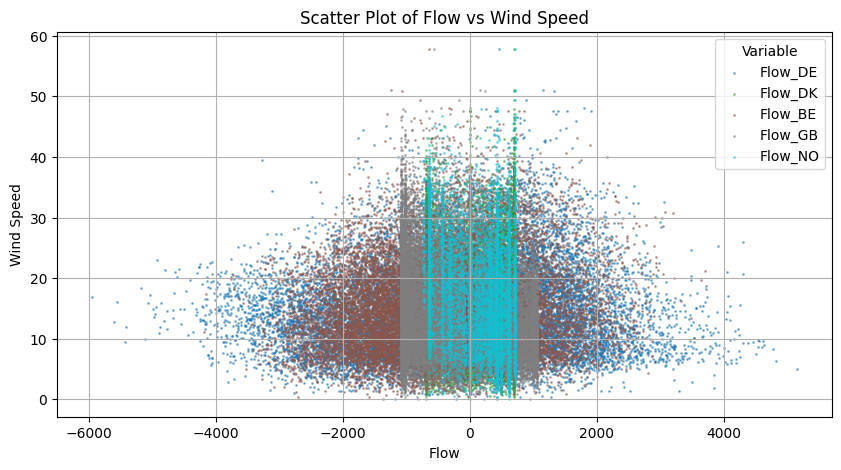

In [77]:
# Define a color map for the variables
colors = plt.cm.get_cmap('tab10', 5)  # Use a colormap with 5 distinct colors

# Plot the scatter plot with different colors for each variable
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Flow_DE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(0), label='Flow_DE')
plt.scatter(df_filtered['Flow_DK'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(1), label='Flow_DK')
plt.scatter(df_filtered['Flow_BE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(2), label='Flow_BE')
plt.scatter(df_filtered['Flow_GB'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(3), label='Flow_GB')
plt.scatter(df_filtered['Flow_NO'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(4), label='Flow_NO')

plt.xlabel('Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Flow vs Wind Speed')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

In [87]:
nan_totalflow = df_filtered['Total_Flow'].isna().sum()
print(nan_totalflow)
nan_temp = df_filtered['temperature_2m'].isna().sum()
print(nan_temp)
nan_cloud = df_filtered['cloud_cover'].isna().sum()
print(nan_cloud)

2
0
0


Mean Squared Error: 394.61381740065895
R^2 Score: 0.925506451387952
                             Coefficient
Load                        2.299864e-02
Total_Flow                 -4.615709e-03
temperature_2m              1.606899e+00
apparent_temperature        5.356117e+00
cloud_cover                -6.535930e-03
wind_speed_10m             -3.414901e+00
diffuse_radiation          -5.824537e-02
direct_normal_irradiance   -4.356158e-02
shortwave_radiation         7.142280e-02
wind_speed_100m             1.020700e+00
production_wind            -3.067861e-02
production_solar           -3.066011e-02
production_heatpump         9.937700e-05
production_cofiring         2.990869e+00
production_geothermal      -4.943262e+00
production_other           -5.094821e-01
production_waste            1.576419e+00
production_biooil          -2.836671e-01
production_biomass          5.520032e-01
production_wood            -9.477479e-05
production_windoffshore    -2.718467e-05
production_fossilgaspower  -3.

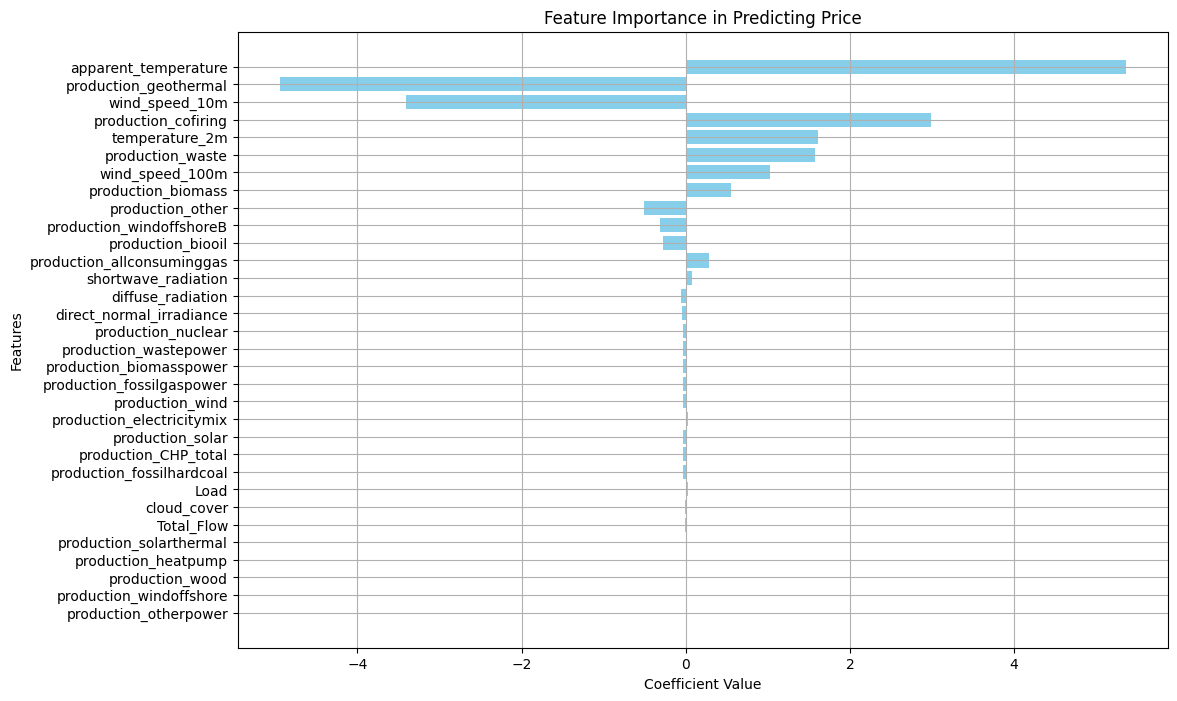

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values in the relevant columns
df_filtered_regr = df_filtered[['Price', 'Load', 'Total_Flow', 'temperature_2m', 'apparent_temperature', 'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation', 'wind_speed_100m', 'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas']].dropna()

# Check if the DataFrame is empty
if df_filtered_regr.empty:
    print("The DataFrame is empty after dropping rows with missing values.")
else:
    # Define the features (X) and the target (y)
    X = df_filtered_regr[['Load', 'Total_Flow', 'temperature_2m', 'apparent_temperature', 'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation', 'wind_speed_100m', 'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas']]
    y = df_filtered_regr['Price']

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions on the same dataset
    y_pred = model.predict(X)

    # Evaluate the model
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Get the coefficients of the model
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print(coefficients)

        # Sort the coefficients by absolute value
    coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='abs_coefficient', ascending=True)

    # Plot the coefficients
    plt.figure(figsize=(12, 8))
    plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title('Feature Importance in Predicting Price')
    plt.grid(True)
    plt.show()



In [110]:
df_filtered_regr.head

<bound method NDFrame.head of                             Price      Load  Total_Flow  temperature_2m  \
2022-01-01 00:00:00+00:00  124.70  10249.75      733.50         10.4565   
2022-01-01 01:00:00+00:00  134.00   9907.00      388.25         10.8065   
2022-01-01 02:00:00+00:00   58.80   9782.50     1065.25         10.5065   
2022-01-01 03:00:00+00:00   37.67   9589.75      386.75         10.2565   
2022-01-01 04:00:00+00:00   39.70   9508.00      499.25         10.1565   
...                           ...       ...         ...             ...   
2022-01-06 19:00:00+00:00  218.58  14498.00    -1275.50          2.9565   
2022-01-06 20:00:00+00:00  203.31  13776.75     -671.50          2.8565   
2022-01-06 21:00:00+00:00  184.70  12972.00     -259.50          3.1565   
2022-01-06 22:00:00+00:00  136.48  12283.25     -522.25          3.4565   
2022-01-06 23:00:00+00:00  128.92  11740.00       85.75          3.3565   

                           apparent_temperature  cloud_cover  wind_sp